In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


In [46]:
df_train=pd.read_csv("E:\\flip_robo\\Project-Housing_splitted\\train.csv")
df_test=pd.read_csv("E:\\flip_robo\\Project-Housing_splitted\\test.csv")
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [47]:
df_train.shape

(1168, 81)

In [48]:
df_test.shape

(292, 80)

In [49]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [50]:
df_train.shape

(1168, 81)

In [51]:
df_test.shape

(292, 80)

In [52]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [53]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [56]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

___Handling missing values in numeric data

<AxesSubplot:ylabel='Density'>

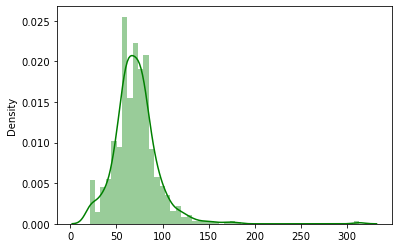

In [57]:
sns.distplot(x=df_train['LotFrontage'],kde=True,color='green')

It almost form normal curve but it has skewness

In [58]:
df_mod=df_train
df_mod_test=df_test

In [59]:
df_mod['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_mod_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

<AxesSubplot:ylabel='Density'>

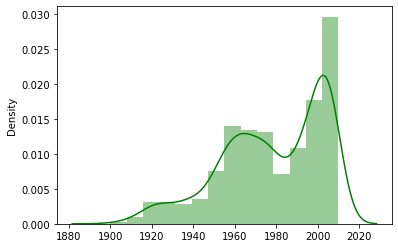

In [60]:
sns.distplot(x=df_train['GarageYrBlt'],kde=True,color='green')

the GarageYrBlt feature is not distributed normally so I'm using median for fill the value

In [61]:
df_mod['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median())
df_mod_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())

<AxesSubplot:ylabel='Density'>

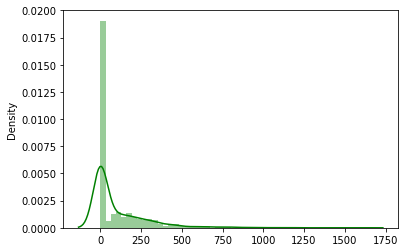

In [62]:
sns.distplot(x=df_train['MasVnrArea'],kde=True,color='green')

In [63]:
df_mod['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median())
df_mod_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median())

In [64]:
((1168-1161)/1168)*100

0.5993150684931506

In [65]:
((1168-1124)/1168)*100

3.767123287671233

In [66]:
((1168-931)/1168)*100

20.291095890410958

poolQc feature have only 0.5% of data,Fence have only 20.2% data and miscFeature have only 3.7% data.we cannot predict using these features so I'm going to drop all three features

In [67]:

colu=['PoolQC','Fence', 'MiscFeature','Alley']
df_mod=df_mod.drop(colu,axis=1)
df_mod_test=df_mod_test.drop(colu,axis=1)

In [68]:
df_mod.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

___Handling missing values in object features

In [69]:
cols=['MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure',
'BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond']
for i in range(0,11):
    df_mod[cols[i]]=df_train[cols[i]].fillna(df_train[cols[i]].mode().iloc[0])
    df_mod_test[cols[i]]=df_test[cols[i]].fillna(df_test[cols[i]].mode().iloc[0])
    

In [70]:
 df_mod_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode().iloc[0])

In [71]:
df_mod.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [72]:
df_mod_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

All null values are removed

In [73]:
col=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
col_object=[]
for i in col:
    if df_mod[i].dtype==object:
        col_object.append(i)
print(col_object)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


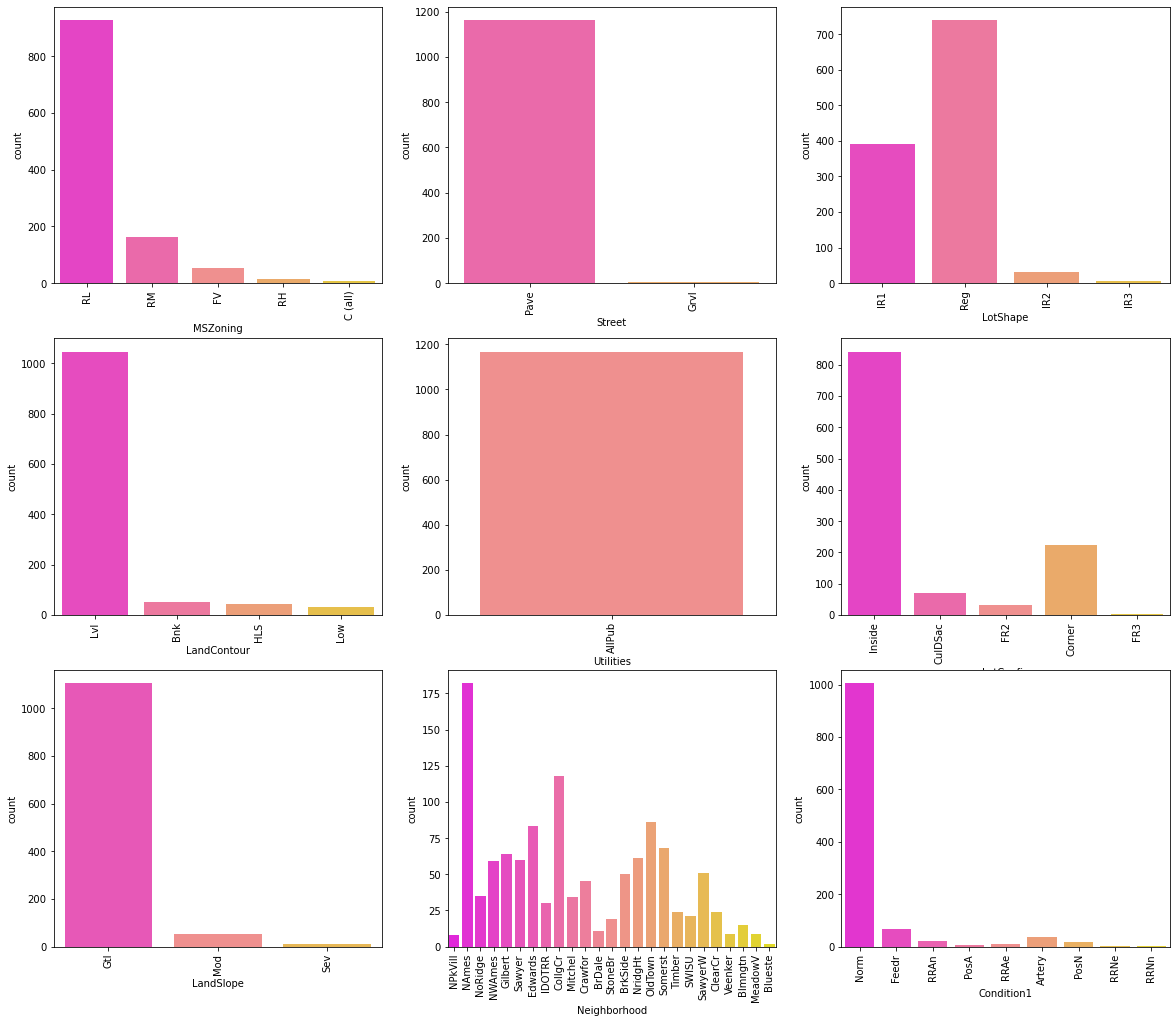

In [74]:
data=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']
ncol=3
nrows=10
plt.figure(figsize=(20,60))
for i in range(0,9):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df_mod,palette="spring")
    plt.xticks(rotation=90)

In [75]:
df_mod['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [76]:
df_mod['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

the feature Utilities have only one value all public utilities so It will not create impact on target value

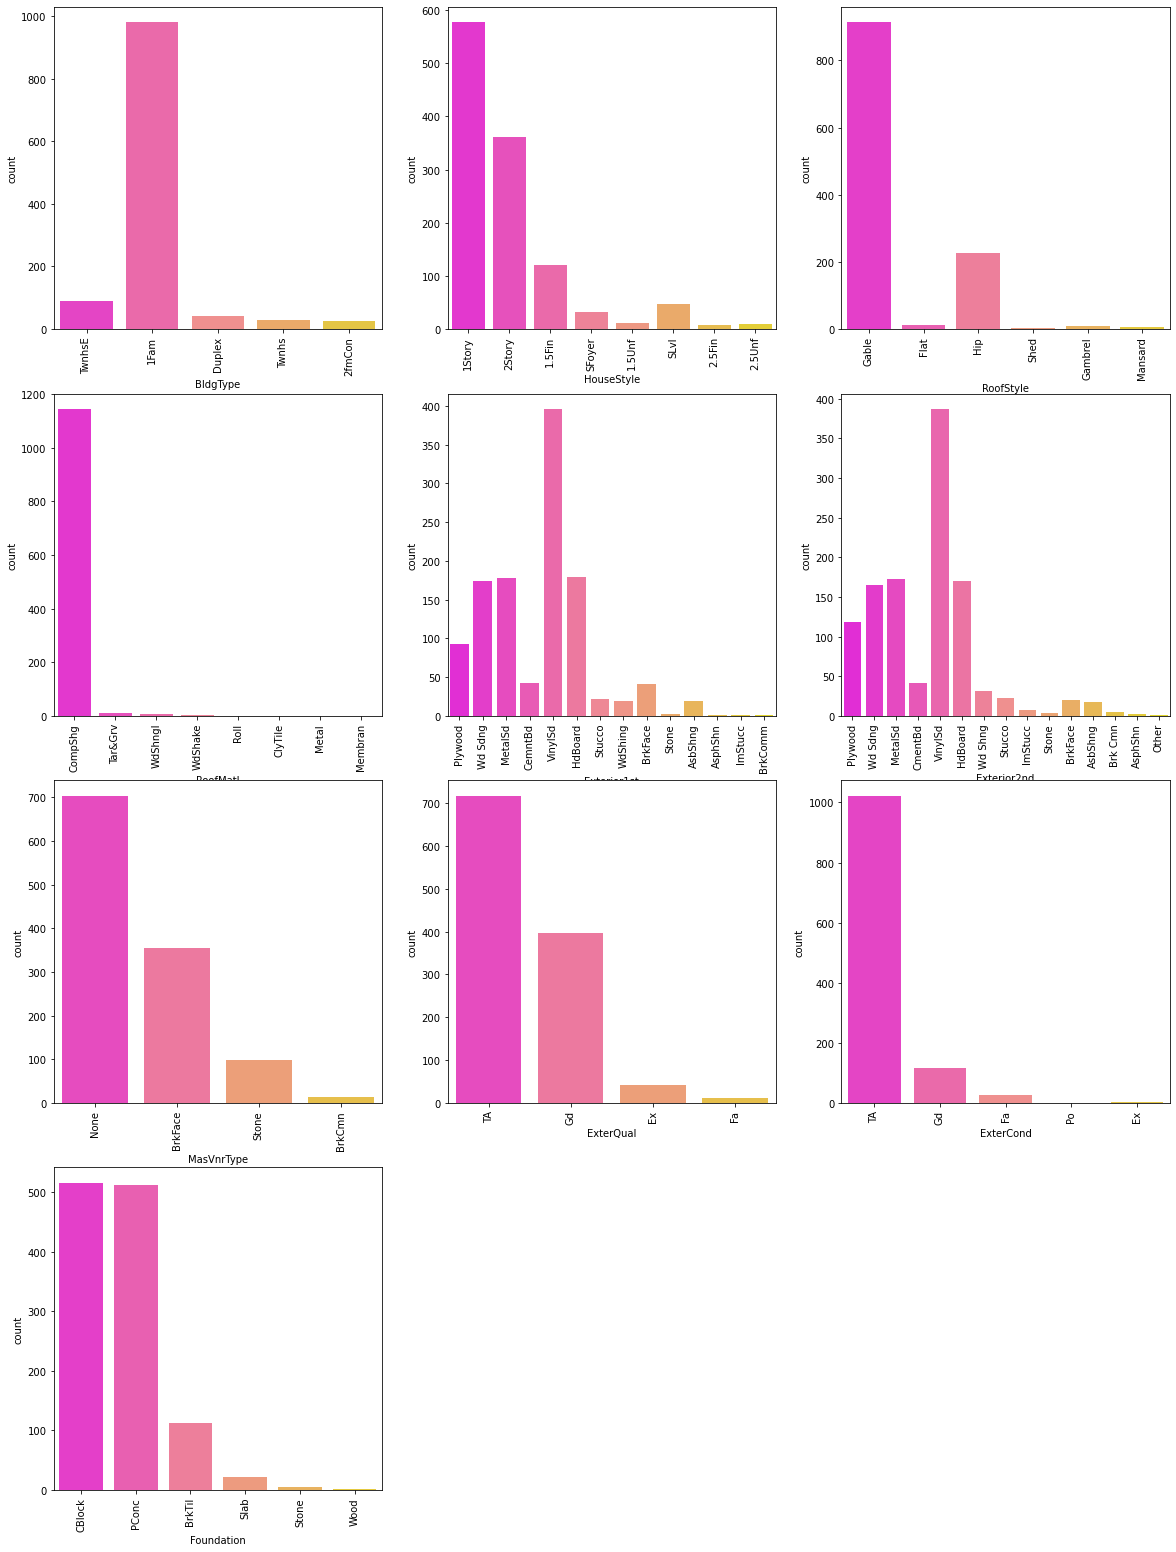

In [77]:
data=['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation']
ncol=3
nrows=10
plt.figure(figsize=(20,70))
for i in range(0,10):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df_mod,palette="spring")
    plt.xticks(rotation=90)

In [78]:
df_train['ExterCond'].value_counts()

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

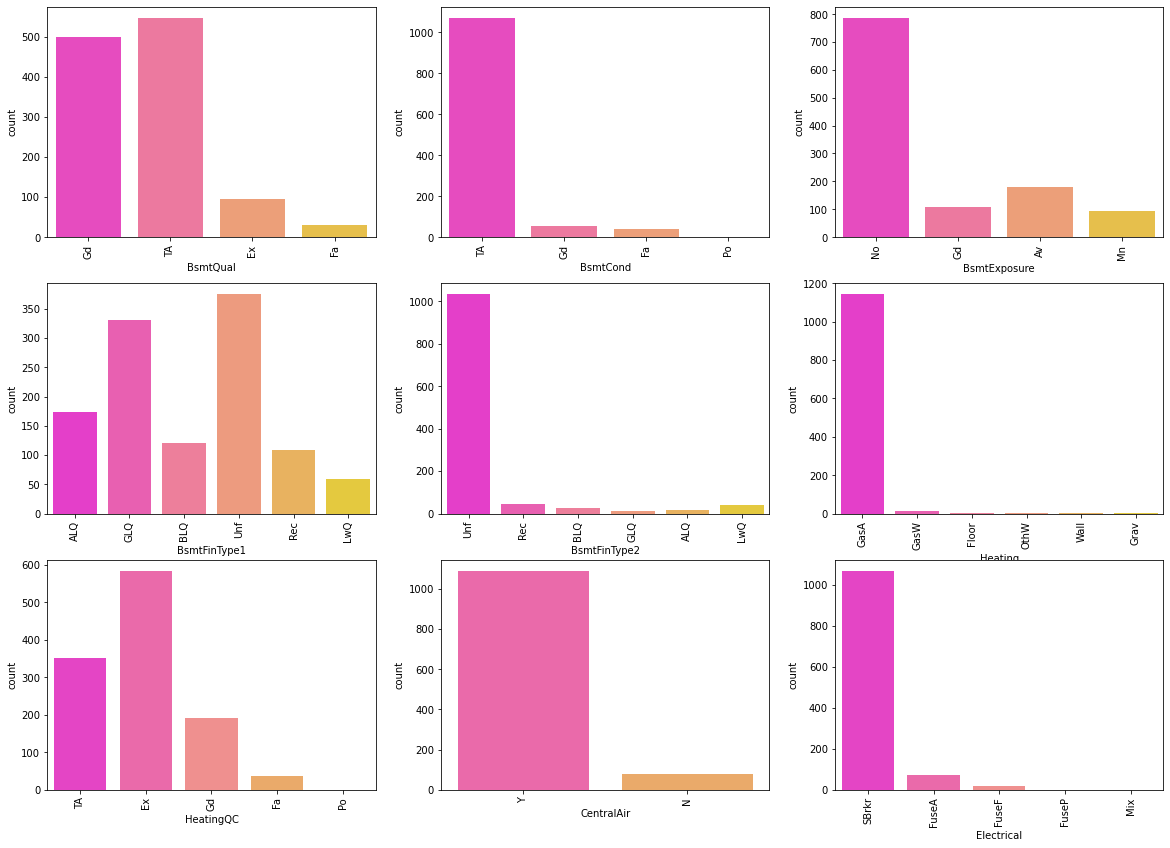

In [35]:
data=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
ncol=3
nrows=10
plt.figure(figsize=(20,50))
for i in range(0,9):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df_mod,palette="spring")
    plt.xticks(rotation=90)

majority of buyers compromise in basement quality and condition even if it is average they ready to buy.
majority of buyers expecting Gas forced warm air furnace for heating
majority of buyers expecting centralized A/C 
majority of buyers expecting Standard Circuit Breakers & Romex for Electricity


In [1]:
df_train['CentralAir'].value_counts()

NameError: name 'df_train' is not defined

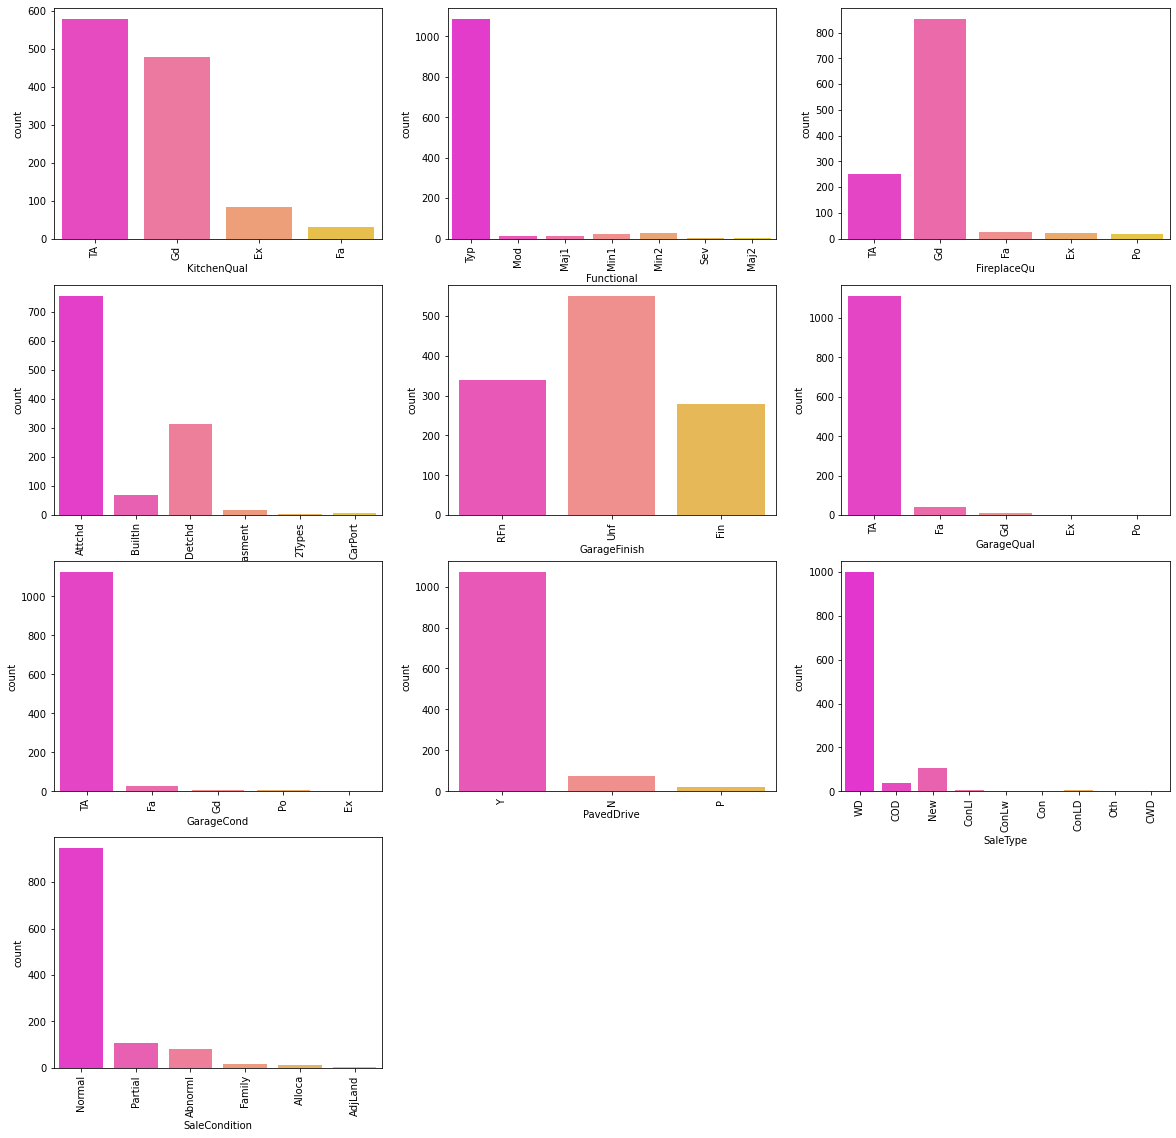

In [37]:
data=['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
ncol=3
nrows=10
plt.figure(figsize=(20,50))
for i in range(0,10):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df_mod,palette="spring")
    plt.xticks(rotation=90)

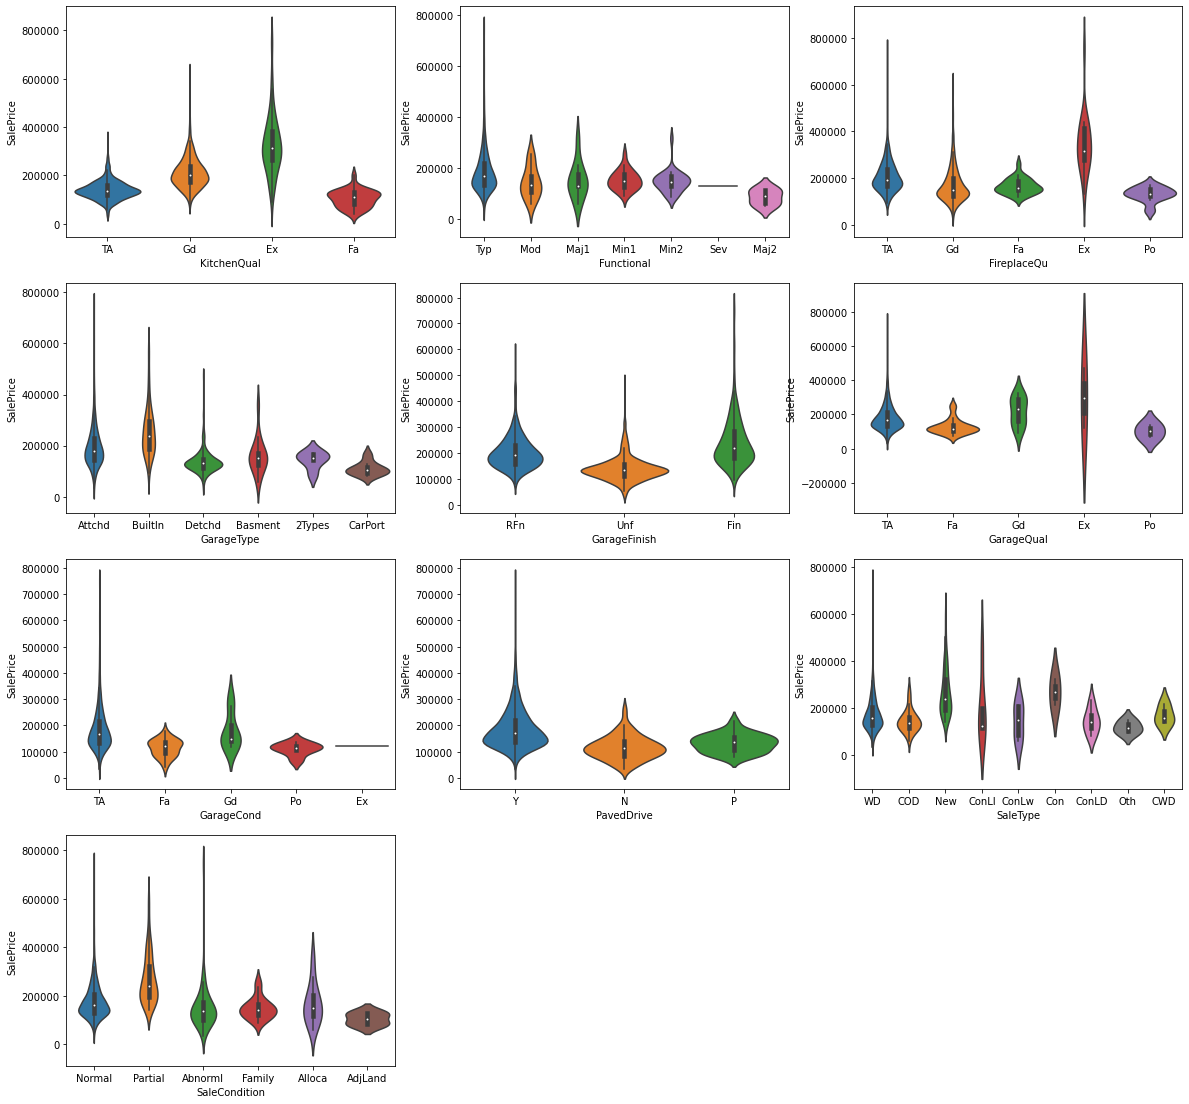

In [38]:
data=['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
ncol=3
nrows=10
plt.figure(figsize=(20,50))
for i in range(0,10):
    plt.subplot(nrows,ncol,i+1)
    sns.violinplot(x=data[i],y=df_train['SalePrice'],data=df_mod)
   

price value is higher for the house having following amenities
excellent kitchen quality
excellent finished garage
excellent fire place
garage condition should  be typical/Average
garage should be attached with house 
paved drive way
functioning-ready to move
warranty deed-conventional


__NUMERICAL FEATURE

months and years are ordinal data so I'm not checking linear relationship for month and year feature

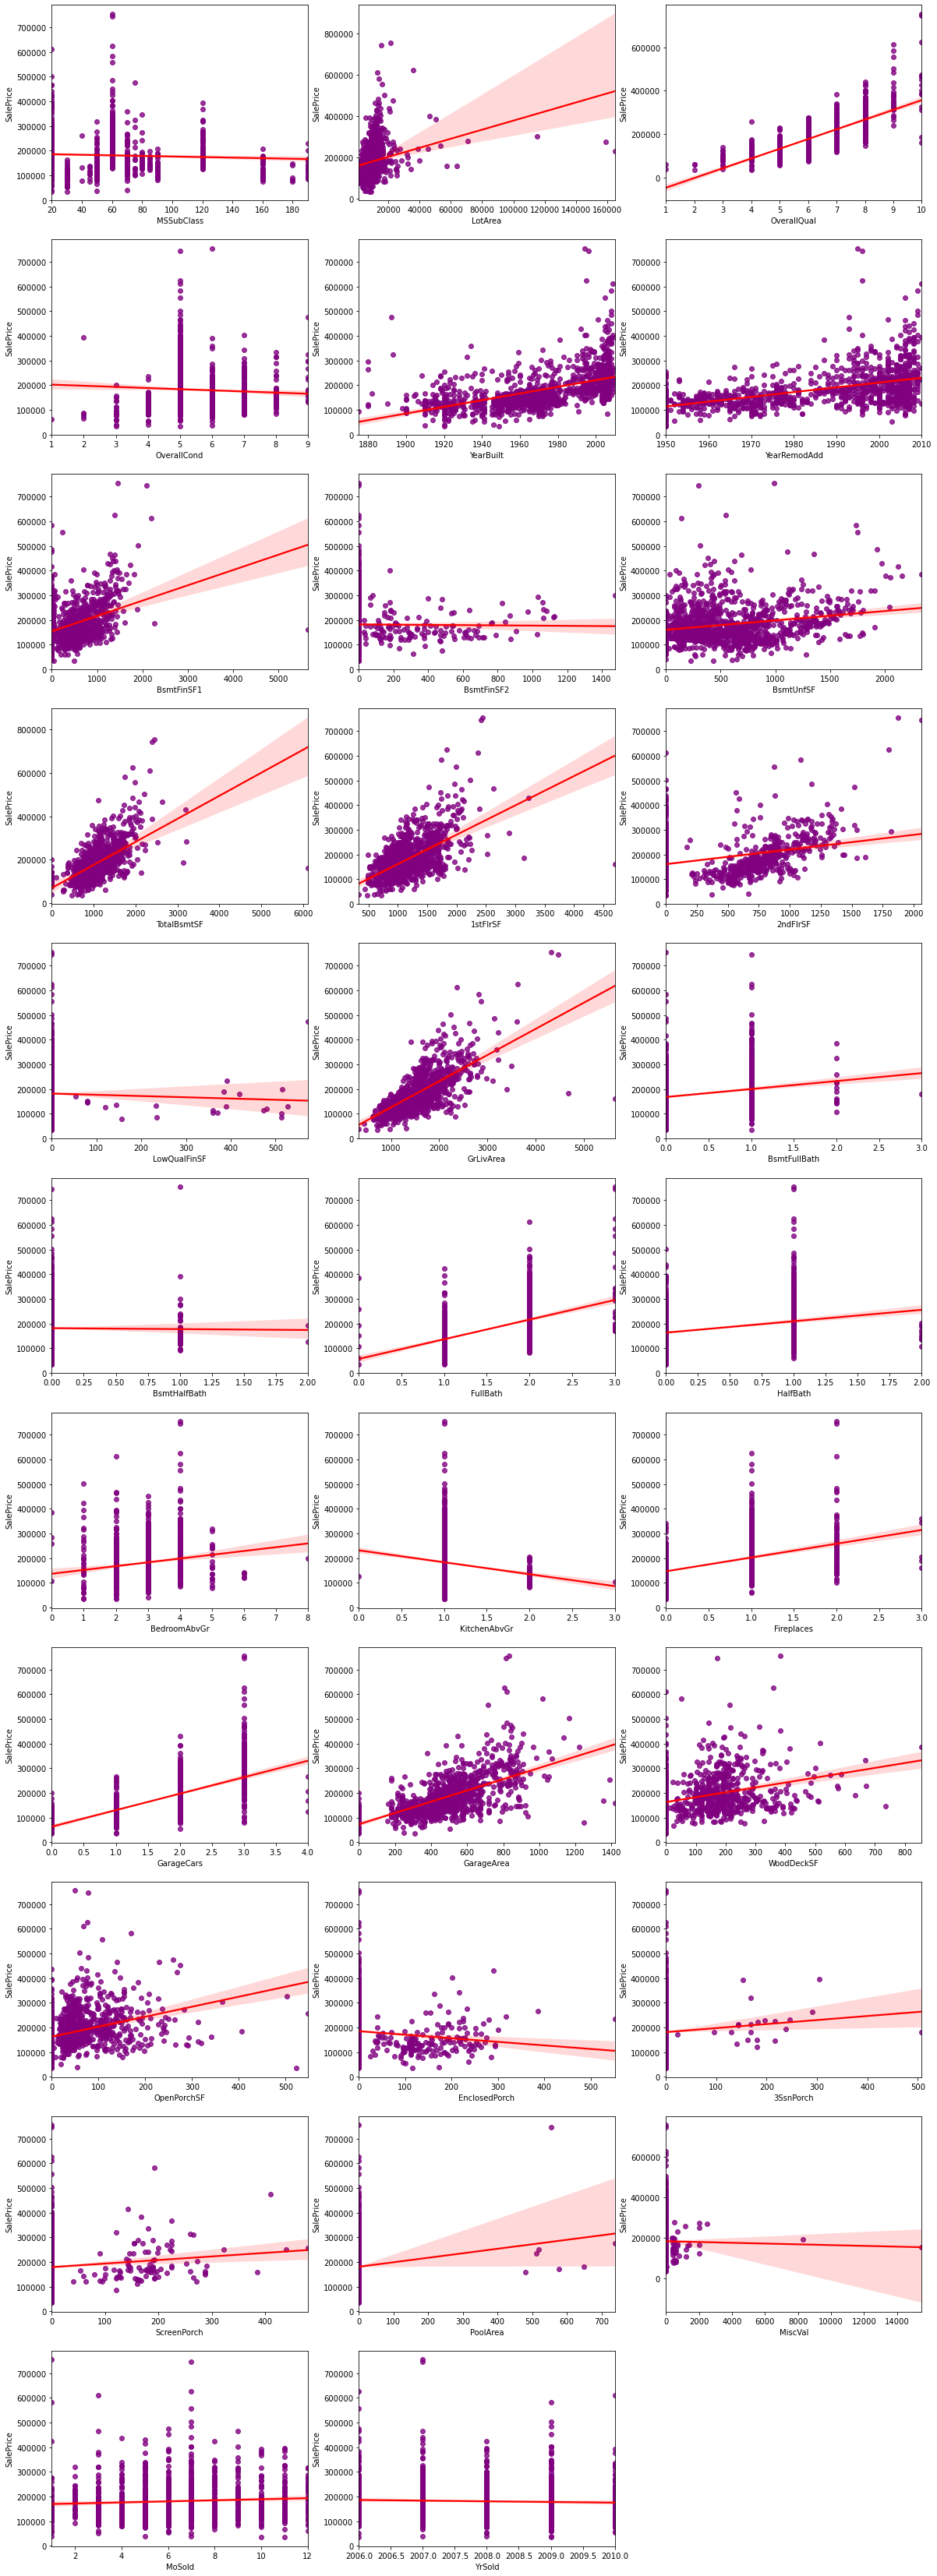

In [137]:
data=['MSSubClass','LotArea','OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','Fireplaces','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']
ncol=3
nrows=11
plt.figure(figsize=(20,60))
for i in range(0,32):
    plt.subplot(nrows,ncol,i+1)
    sns.regplot(x=df_mod[data[i]],y=df_mod['SalePrice'],scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
    ##sns.distplot(x=df_mod[data[i]],kde=True,color='green')

All numeric features has linear relationship with sale price
The features MSsubclass,oversllqual,overallcond,Bsmtfullbath,,Bsmthalfbath,fullbath,halfbath,bedroomabvgrd,kitchenabgrd,fireplce,garagecars,mosold and yrsold are categorical feature with numerical value
GrLivArea,garage area,yrbuilt,woodDecksf,totalbsmtsf,1stfloorsf,2ndfloorsf are strongly and positively correlated with sale price

In [42]:
df_mod['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

In [43]:
df_mod['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

In [44]:
df_mod['PoolArea'].value_counts()

0      1161
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

The outliers shown in pool area feature is not outlier.The most frequent value of pool area  is 0  but we have to consider house with pool area

In [45]:
df_mod['3SsnPorch'].value_counts()

0      1146
168       3
144       2
216       2
180       2
140       1
153       1
162       1
130       1
23        1
182       1
196       1
96        1
238       1
245       1
290       1
304       1
508       1
Name: 3SsnPorch, dtype: int64

In [46]:
df_mod['BsmtFinSF2'].value_counts()

0       1032
180        5
93         2
468        2
294        2
290        2
287        2
182        2
147        2
117        2
374        2
64         2
41         2
96         1
630        1
620        1
612        1
608        1
606        1
580        1
551        1
547        1
546        1
544        1
539        1
532        1
531        1
500        1
495        1
486        1
480        1
479        1
472        1
469        1
32         1
466        1
441        1
438        1
627        1
634        1
411        1
869        1
1127       1
1120       1
1080       1
1063       1
1061       1
1057       1
1031       1
1029       1
972        1
906        1
872        1
841        1
645        1
823        1
791        1
768        1
764        1
723        1
712        1
692        1
690        1
682        1
670        1
661        1
435        1
396        1
400        1
149        1
202        1
193        1
184        1
181        1
68         1
177        1
175        1

In [47]:
df_mod['BsmtFinSF1'].value_counts()

0       375
24       10
16        8
20        5
616       5
504       4
662       4
655       4
600       4
560       4
553       4
641       4
767       3
182       3
672       3
660       3
210       3
643       3
633       3
626       3
28        3
588       3
936       3
547       3
288       3
300       3
507       3
312       3
1201      3
1200      3
336       3
338       3
340       3
456       3
442       3
360       3
428       3
375       3
400       3
674       3
569       3
685       3
168       3
733       3
686       3
120       3
697       3
789       3
680       2
724       2
468       2
784       2
732       2
483       2
486       2
728       2
998       2
1000      2
490       2
765       2
493       2
495       2
498       2
500       2
503       2
505       2
460       2
450       2
735       2
454       2
390       2
392       2
747       2
403       2
405       2
1088      2
777       2
1084      2
419       2
425       2
740       2
1059      2
432       2
1056

Most of the numeric features are ordinal so need to find outliers and skewness

__CORRELATION

In [ ]:
numColumns = df_mod.columns[df_mod.dtypes!=object]
for col in numColumns:
    if df_mod['SalePrice'].corr(df_mod[col]) > 0.5:
        print('Correlation between SalePrice and',col, '=' ,df_train['SalePrice'].corr(df_mod[col]))

These are the features are higly correlated with saleprice

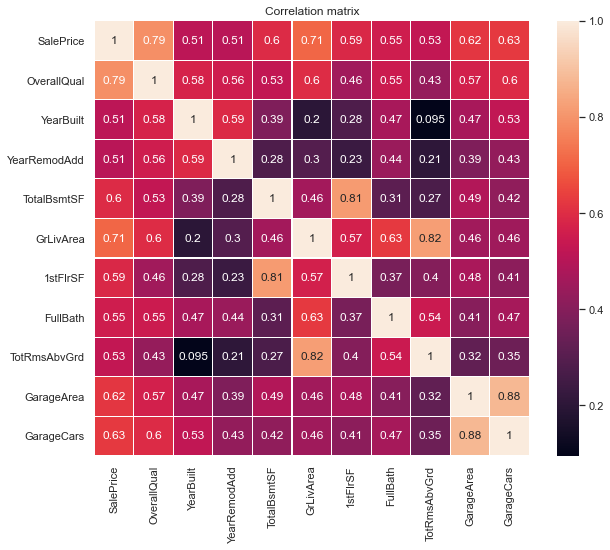

In [49]:

corr=df_mod[["SalePrice","OverallQual","YearBuilt","YearRemodAdd",
                        "TotalBsmtSF","GrLivArea","1stFlrSF","FullBath",
                            "TotRmsAbvGrd","GarageArea","GarageCars",'MSZoning']].corr()

sns.set(font_scale=1.0)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, square=True, annot=True, linewidths=0.1,linecolor="white")
plt.title('Correlation matrix');



GrLivArea and TotalBsmtSF has a very linearly relation with 'SalePrice'.
All the features are positivly related with target, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
OverallQual and 'YearBuilt' and also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the scatter plot shows how sales prices increase with the overall quality.
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.
    'TotalBsmtSF' and '1stFlrSF' are strongly and positively correlated


In [79]:
train_encod=df_mod
from sklearn import preprocessing 
categ_cols = df_mod.dtypes[df_mod.dtypes == np.object]        # filtering by categorical variables
categ_cols = categ_cols.index.tolist() 
# list of categorical fields
for col in categ_cols:
    label = preprocessing.LabelEncoder()
    train_encod[col]= label.fit_transform(df_mod[col])

In [80]:
from sklearn import preprocessing 
test_encod=df_mod_test
categ_cols_test = df_mod_test.dtypes[df_mod_test.dtypes == np.object]        # filtering by categorical variables
categ_cols_test= categ_cols_test.index.tolist() 
# list of categorical fields
for col in categ_cols:
    label = preprocessing.LabelEncoder()
    test_encod[col]= label.fit_transform(df_mod_test[col])

In [81]:
train_encod.shape

(1168, 77)

In [82]:
test_encod.shape

(292, 76)

In [84]:
col_r=['Id','SalePrice']
x1=train_encod.drop(col_r,axis=1)
y1=train_encod['SalePrice']
test_encod=test_encod.drop('Id',axis=1)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_test = scaler.fit_transform(test_encod)

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
x=scaled
y=y1

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
from sklearn.feature_selection import mutual_info_classif
imp_feature = pd.DataFrame(mutual_info_classif(x1,y1),index=x1.columns)

<AxesSubplot:>

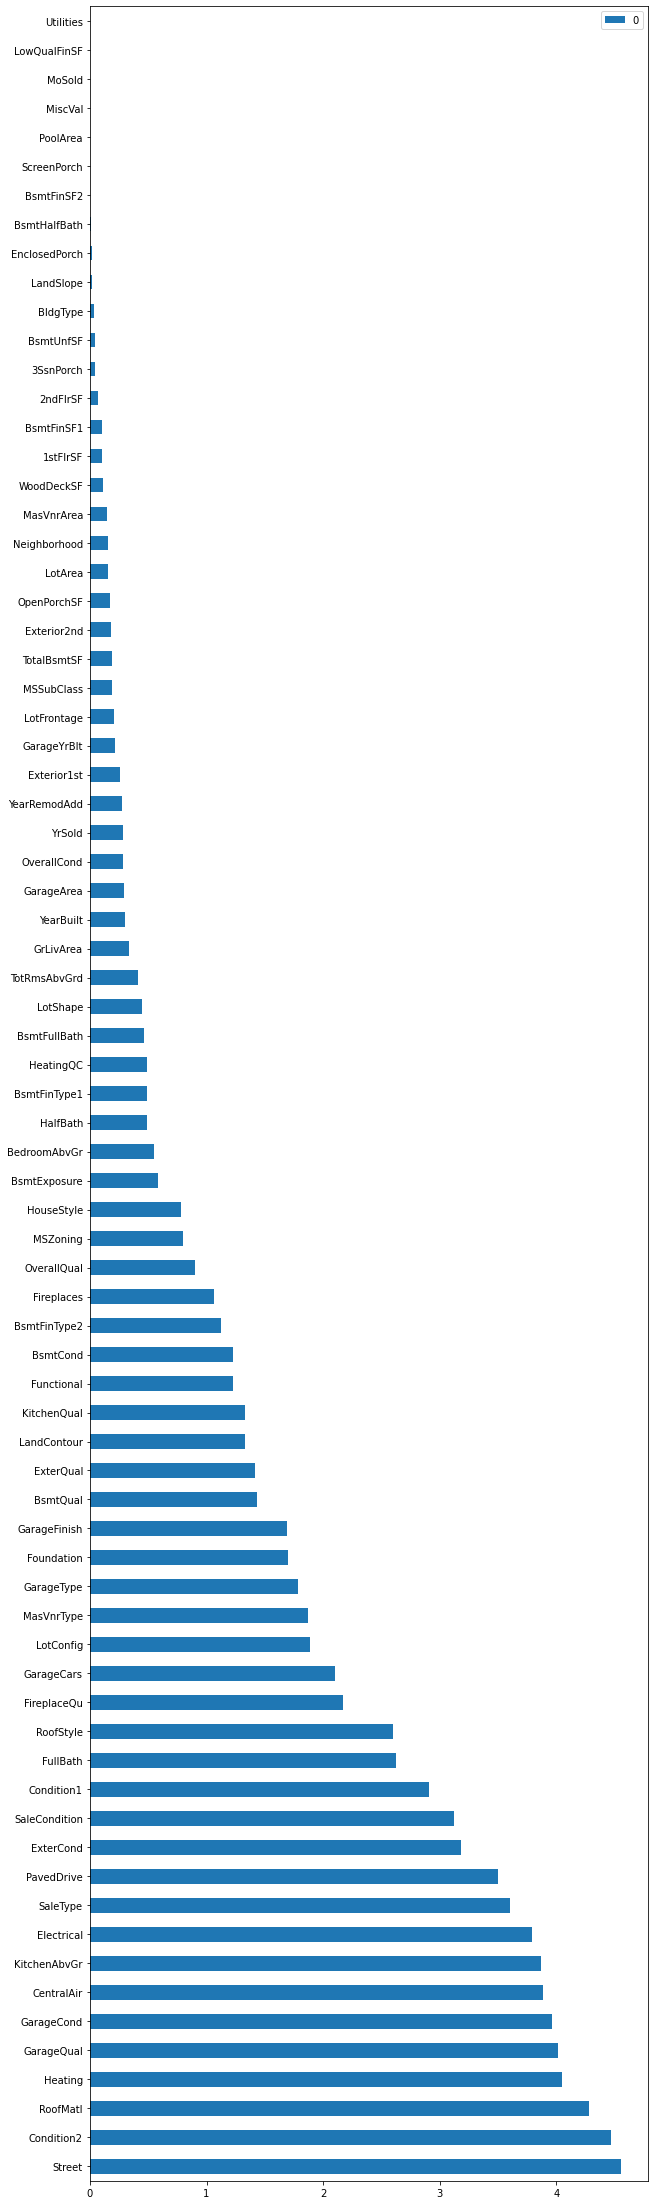

In [91]:
imp_feature.sort_values(by=0,ascending=False).plot(kind='barh',figsize=(10,40))

In [92]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),Ridge(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor(objective="reg:squarederror")]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [93]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    
    
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)


KNeighborsRegressor()
Mean absolute error 28146.740932642486
Mean squared error 1708658174.0990674
Root Mean squared error 41335.91869184798
R2 Score 0.7119381906222544
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 55561.535005685895
Mean squared error 6401199431.000112
Root Mean squared error 80007.49609255443
R2 Score -0.07917494454615026
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 27017.93523316062
Mean squared error 1527703074.0854921
Root Mean squared error 39085.84237400407
R2 Score 0.7424453185640537
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 22251.033363725797
Mean squared error 1109908615.0045874
Root Mean squared error 33315.29100885339
R2 Score 0.8128810731551086
-----------------------

In [95]:
scorel=[]

In [96]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.69375879, 0.70078124, 0.66805857, 0.70577678, 0.67881802])

In [97]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-0.03485217, -0.13001527, -0.02716203, -0.11332468, -0.00296562])

In [98]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.7995588 , 0.63534364, 0.70444473, 0.75103551, 0.64152554])

In [99]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.80300407, 0.75769039, 0.49841011, 0.84119831, 0.80625658])

In [100]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.80334236, 0.75820729, 0.50044662, 0.84198153, 0.80719067])

In [101]:
from sklearn.model_selection import cross_val_score
rid=Ridge()
scores=cross_val_score(rid,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.81379074, 0.76974957, 0.59412562, 0.8458594 , 0.83289649])

In [102]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.88628057, 0.78295632, 0.82355694, 0.89076514, 0.84312137])

In [103]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.90209999, 0.75485589, 0.89452895, 0.90751454, 0.86240266])

In [104]:
from sklearn.model_selection import cross_val_score
xr=xgb.XGBRegressor()
scores=cross_val_score(xr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.82786075, 0.71818731, 0.87100416, 0.89138453, 0.85959027])

In [105]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),Ridge(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]
for i in range(0,9):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [-0.0181794  -0.01115695 -0.04387962 -0.00616141 -0.03312017]
SVR() difference is [ 0.04432277 -0.05084033  0.05201291 -0.03414974  0.07620933]
DecisionTreeRegressor() difference is [ 0.05711348 -0.10710168 -0.03800059  0.00859019 -0.10091978]
LinearRegression() difference is [-0.00987701 -0.05519068 -0.31447096  0.02831724 -0.0066245 ]
Lasso() difference is [-0.00981187 -0.05494694 -0.31270761  0.02882729 -0.00596356]
Ridge() difference is [ 9.66523437e-05 -4.39445264e-02 -2.19568475e-01  3.21653087e-02
  1.92023963e-02]
RandomForestRegressor() difference is [ 0.01791088 -0.08541338 -0.04481276  0.02239544 -0.02524833]
GradientBoostingRegressor() difference is [ 0.02338662 -0.12385748  0.01581558  0.02880117 -0.01631071]
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             

Lasso has least difference

In [131]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (np.logspace(-1, 1,100))
              }
grid = GridSearchCV(Lasso(), param_grid = parameters, cv = 5, scoring = "r2")

In [132]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'alpha': 10.0}


In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model1=Lasso(alpha=10.0)
model1.fit(xtrain,ytrain)
p=model1.predict(xtest)
acc=model1.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 82.0
Mean absolute error 22079.57395561024
Mean squared error 1096339030.0255156
Root Mean squared error 33111.010706795336
r2 score 82.0


best model:Lasso
best parameter:{'alpha': 10.0}
After hyper tuning the accuracy increased to 82%
